<a href="https://colab.research.google.com/github/sihyun10/Deeplearning_class/blob/main/deeplearning%5B11%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#생성 모델 (Generative Model) - 비지도 학습모델이다. (대표적)
#비지도 학습 모델 : GAN, Auto-Encoder

#생성모델, 오토인코더(Auto-Encoder), GAN(Generative Adversarial Network) 개념 이해 _ 학습목표

# 1. 생성 모델(Generative Model) 알아보기

#Keras의 함수형 API
#MNIST 숫자 이미지를 처리하는 신경망
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#함수형 API를 통해 원하는 방식으로 객체들을 연결하여 사용
# -> 은닉층의 출력을 파악할 수 있는 장점이 있다.
#MNIST 숫자 이미지를 처리하는 신경망
#함수형 API 작성해보기

In [3]:
inputs = keras.Input(shape=(784,))       # (1) 
dense = layers.Dense(64, activation="relu")      # (2) 
x = dense(inputs)             # (3) 
x = layers.Dense(64, activation="relu")(x)  # (4) 
outputs = layers.Dense(10)(x)      # (5)

In [4]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
x_train= x_train.reshape(60000, 784).astype("float32") / 255 
x_test= x_test.reshape(10000, 784).astype("float32") / 255

In [7]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer = keras.optimizers.RMSprop(),
    metrics = ["accuracy"]
    )

In [8]:
history = model.fit(x_train, y_train, batch_size= 64, epochs = 2, 
                    validation_split= 0.2)

test_scores= model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/2
750/750 [==============================] - 7s 6ms/step - loss: 0.3424 - accuracy: 0.9029 - val_loss: 0.1858 - val_accuracy: 0.9483
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1602 - accuracy: 0.9527 - val_loss: 0.1378 - val_accuracy: 0.9591
313/313 - 0s - loss: 0.1353 - accuracy: 0.9576 - 451ms/epoch - 1ms/step


In [9]:
#오토인코더(Auto-Encoder) 알아보기

#입력과 같은 출력을 만드는 것을 목적으로 하는 신경망
#특징학습, 차원축소, 표현학습 등에 주로 사용. -> 어떻게 차원축소를 할까?

#인코더(Encoder) : 입력을 잠재 표현으로 인코딩
#디코더(Decoder) : 잠재 표현을 풀어서 입력으로 복원
#손실 함수 : 입력 이미지와 출력이미지의 MSE를 사용

In [10]:
#Keras를 이용하여 오토인코더 모델 구성
#필기체 숫자를 압축하는 오토인코더 모델을 구성해보자.

import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf

In [11]:
# 32 픽셀로압축
encoding_dim= 32

In [12]:
#함수형 API로 신경망 구성

input_img= tf.keras.layers.Input(shape = (784,)) 
encoded = tf.keras.layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation = 'sigmoid')(encoded) 
autoencoder = tf.keras.models.Model(input_img, decoded)

In [13]:
#손실 함수로 MSE 사용 (픽셀 간의 차이를 계산)
autoencoder.compile(optimizer = 'adam', 
                    loss = tf.keras.losses.MeanSquaredError())

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
#필기체 숫자를 압축하는 오토인코더 모델을 구성해보자.
#1차원으로 평탄화

x_train= x_train.astype('float32') / 255. 
x_test= x_test.astype('float32') / 255. 
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [16]:
#필기체 숫자를 압축하는 오토인코더 모델을 구성해보자.

autoencoder.fit(x_train, x_train, 
                epochs = 50, 
                batch_size= 256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0697 - val_loss: 0.0403
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0344 - val_loss: 0.0289
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0260 - val_loss: 0.0229
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0213 - val_loss: 0.0192
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0159 - val_loss: 0.0146
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0116 - val_loss: 0.0110

In [17]:
decoded_imgs= autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


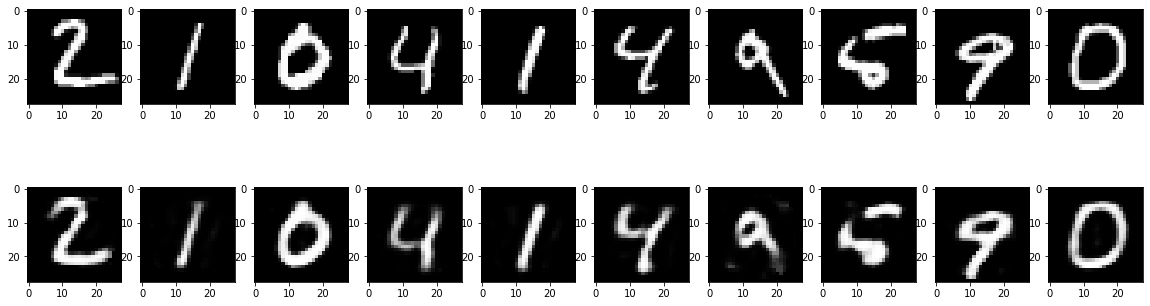

In [18]:
n = 10 
plt.figure(figsize= (20, 6)) 
for i in range(1, n + 1): 
  ax = plt.subplot(2, n, i) 
  plt.imshow(x_test[i].reshape(28, 28), cmap= 'gray') 
  
  ax = plt.subplot(2, n, i+ n) 
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray') 
  
plt.show()

In [19]:
#잡음을 제거하는 오토인코더
#오토인코더는 잡음(Noise)이 있는 이미지에서 잡음을 제거하는 용도로도 사용할 수 있음

#잡음이 들어간 필기체 숫자를 복원하는 오토인코더 모델을 구성해보자
#함수형 API로 신경망 구성

import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf

In [20]:
encoding_dim= 32 
input_img= tf.keras.layers.Input(shape = (784,)) 
encoded = tf.keras.layers.Dense(encoding_dim, activation = 'relu')(input_img) 
decoded = tf.keras.layers.Dense(784, activation = 'sigmoid')(encoded) 
autoencoder = tf.keras.models.Model(input_img, decoded)

In [21]:
#MNIST 데이터 처리
mnist = tf.keras.datasets.mnist

In [22]:
(x_train, _), (x_test, _) = mnist.load_data() 
x_train = x_train.astype('float32') / 255. 
x_test= x_test.astype('float32') / 255. 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
#Numpy 연산을 이용하여 이미지에 잡음 추가

noise_factor= 0.55

In [24]:
original_train= x_train 
original_test= x_test
noise_train= np.random.normal(0, 1, original_train.shape) 
noise_test= np.random.normal(0, 1, original_test.shape) 
noisy_train= original_train + noise_factor * noise_train
noisy_test= original_test + noise_factor * noise_test

In [25]:
#잡음이 들어간 필기체 숫자를 복원하는 오토인코더 모델을 구성해보자.

autoencoder.compile(optimizer = 'adam', loss = 'mse')

In [26]:
autoencoder.fit(noisy_train, original_train, 
                epochs = 50, batch_size= 256, shuffle=True, 
                validation_data= (noisy_test, original_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0745 - val_loss: 0.0467
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0405 - val_loss: 0.0353
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0329 - val_loss: 0.0304
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0291 - val_loss: 0.0276
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0267 - val_loss: 0.0256
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0250 - val_loss: 0.0242
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0224 - val_loss: 0.0220
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0220 - val_loss: 0.0217

In [27]:
denoised_images= autoencoder.predict(noisy_test)

313/313 [==============================] - 1s 2ms/step


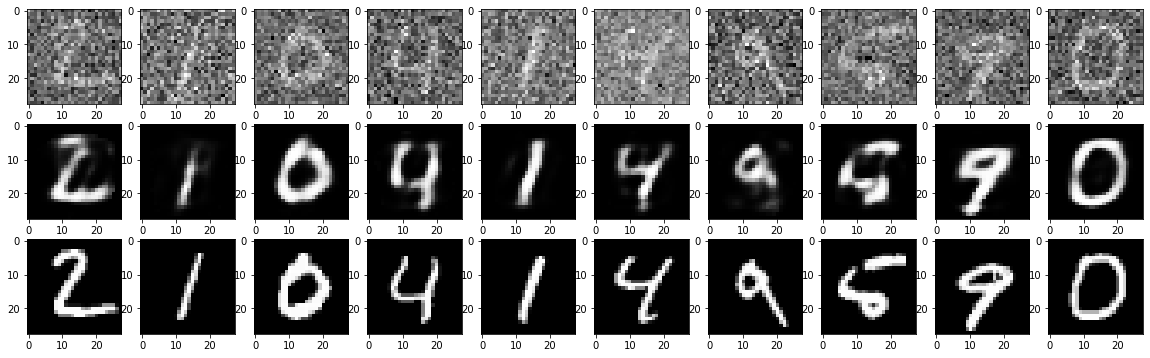

In [28]:
n = 10 
plt.figure(figsize= (20, 6)) 
for i in range(1, n + 1): 
  ax = plt.subplot(3, n, i) 
  plt.imshow(noisy_test[i].reshape(28, 28), cmap= 'gray') 
  plt.gray() 
  
  ax = plt.subplot(3, n, i+ n) 
  plt.imshow(denoised_images[i].reshape(28, 28), cmap= 'gray') 
  plt.gray() 
  
  ax = plt.subplot(3, n, i+ 2 * n) 
  plt.imshow(original_test[i].reshape(28, 28), cmap= 'gray') 
  plt.gray() 

plt.show()

In [29]:
# 3. 생성적 적대 신경망

#GAN으로 숫자 이미지를 생성해보자

import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt

In [30]:
# 학습데이터와평가데이터분리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [31]:
# 이미지를[0, 1] 범위로스케일링

x_train = x_train.astype("float32") / 255 
x_test= x_test.astype("float32") / 255

In [32]:
# 입력 데이터 평탄화

BATCH_SIZE = 128 
EPOCHS = 2000 
Z_DIMENSIONS = 32 
data = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))

In [33]:
#판별자 신경망 모델 구성하기
def make_discriminator(): 
  model = tf.keras.Sequential() 
  model.add(tf.keras.layers.Conv2D(64, (5, 5), strides = (2, 2), padding='same', 
                                   activation='relu', input_shape=[28, 28, 1])) 
  model.add(tf.keras.layers.Dropout(0.4)) 
  model.add(tf.keras.layers.Conv2D(128, (5, 5), strides = (2, 2), padding='same', 
                                   activation='relu')) 
  model.add(tf.keras.layers.Dropout(0.4)) 
  model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding = 'same', 
                                   activation='relu')) 
  model.add(tf.keras.layers.Dropout(0.4)) 
  model.add(tf.keras.layers.Flatten()) 
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) 
  
  return model

In [34]:
discriminator = make_discriminator()

In [35]:
discriminator.compile(loss = 'binary_crossentropy',
                      optimizer = tf.keras.optimizers.Adam(lr= 0.0004),
                      metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
#생성자 신경망 모델 구성하기
def make_generator(): 
  model = tf.keras.Sequential() 
  model.add(tf.keras.layers.Dense(7 * 7 * 64, input_shape= (Z_DIMENSIONS,))) 
  model.add(tf.keras.layers.BatchNormalization(momentum = 0.9)) 
  model.add(tf.keras.layers.LeakyReLU()) 
  model.add(tf.keras.layers.Reshape((7, 7, 64))) 
  model.add(tf.keras.layers.Dropout(0.4)) 
  model.add(tf.keras.layers.UpSampling2D()) 
  model.add(tf.keras.layers.Conv2DTranspose(32, kernel_size= 5, 
                                            padding='same', activation=None))
  model.add(tf.keras.layers.BatchNormalization(momentum = 0.9)) 
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.UpSampling2D()) 
  model.add(tf.keras.layers.Conv2DTranspose(16, kernel_size= 5, 
                                            padding='same', activation=None,)) 
  model.add(tf.keras.layers.BatchNormalization(momentum = 0.9)) 
  model.add(tf.keras.layers.LeakyReLU()) 
  model.add(tf.keras.layers.Conv2D(1, kernel_size= 5, 
                                   padding = 'same', activation = 'sigmoid')) 
  
  return model

In [37]:
# 이미지 생성 및 평가
generator = make_generator()

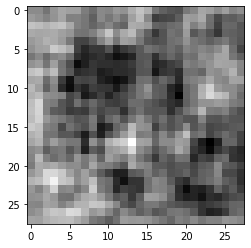

In [38]:
# 현재는완전한잡음(Noise)만출력

noise = tf.random.normal([1, Z_DIMENSIONS]) 
generated_image= generator(noise, training = False) 
plt.imshow(generated_image[0, :, :, 0], cmap= 'gray')

In [39]:
#생성적 적대 신경망 모델 구성하기
z = tf.keras.layers.Input(shape=(Z_DIMENSIONS,)) 
fake_image= generator(z) 
discriminator.trainable= False 
prediction = discriminator(fake_image) 
gan_model= tf.keras.models.Model(z, prediction)

In [40]:
gan_model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(lr= 0.0004),
                  metrics = ['accuracy'])

1/1 [==============================] - 0s 175ms/step


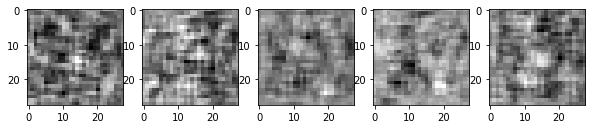

1/1 [==============================] - 0s 30ms/step


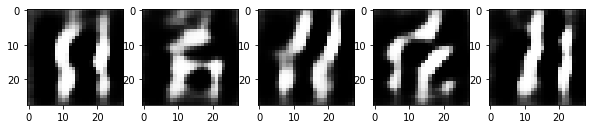

1/1 [==============================] - 0s 30ms/step


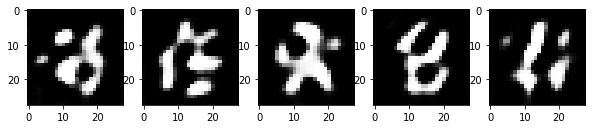

1/1 [==============================] - 0s 34ms/step


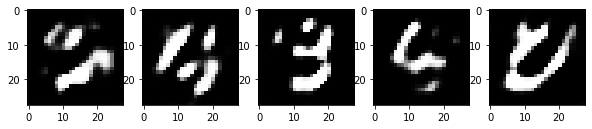

1/1 [==============================] - 0s 29ms/step


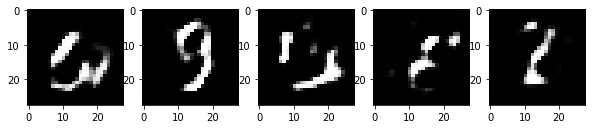

1/1 [==============================] - 0s 30ms/step


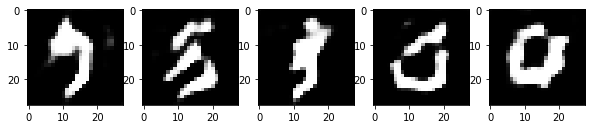

1/1 [==============================] - 0s 33ms/step


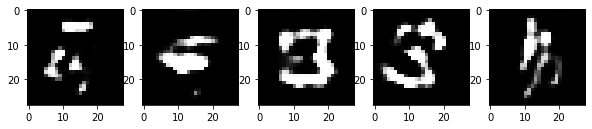

1/1 [==============================] - 0s 29ms/step


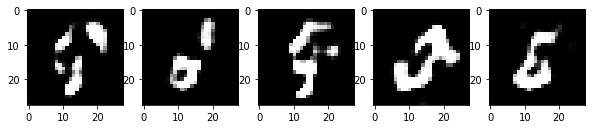

1/1 [==============================] - 0s 29ms/step


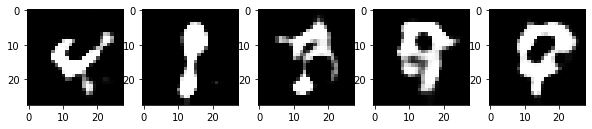

1/1 [==============================] - 0s 32ms/step


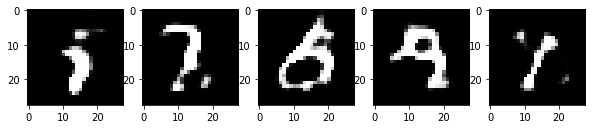

1/1 [==============================] - 0s 29ms/step


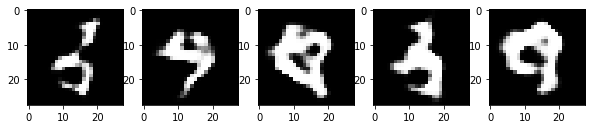

1/1 [==============================] - 0s 29ms/step


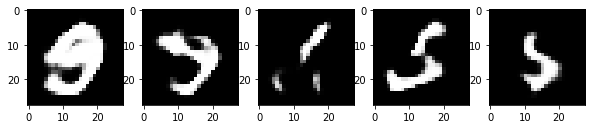

1/1 [==============================] - 0s 30ms/step


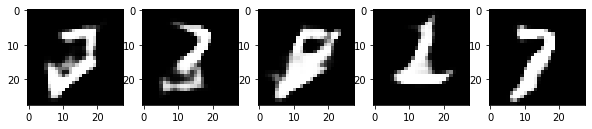

1/1 [==============================] - 0s 29ms/step


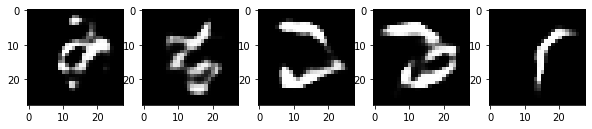

1/1 [==============================] - 0s 31ms/step


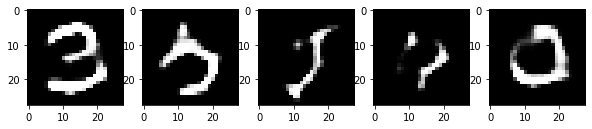

1/1 [==============================] - 0s 29ms/step


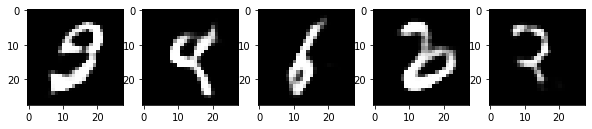

1/1 [==============================] - 0s 33ms/step


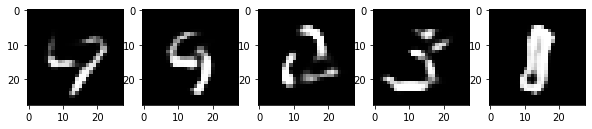

1/1 [==============================] - 0s 29ms/step


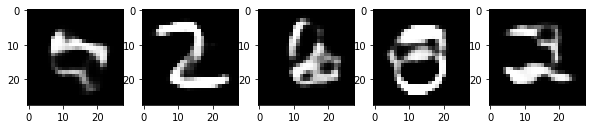

1/1 [==============================] - 0s 29ms/step


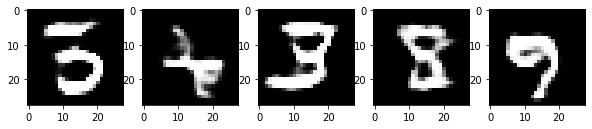

1/1 [==============================] - 0s 30ms/step


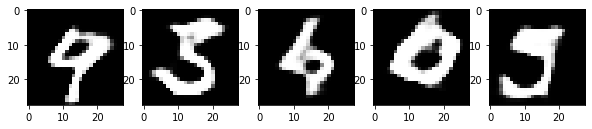

4/4 [==============================] - 0s 77ms/step


In [41]:
def train_gan(): 
  for i in range(EPOCHS): 
    real_images= np.reshape(data[np.random.choice(data.shape[0], 
                                                  BATCH_SIZE, 
                                                  replace = False)],
                            (BATCH_SIZE,28,28,1)) 
    fake_images= generator.predict(np.random.uniform(-1.0, 1.0, 
                                                     size=[BATCH_SIZE, 
                                                           Z_DIMENSIONS])) 
    x = np.concatenate((real_images, fake_images))   # 진짜이미지와가짜이미지결합
    y = np.ones([2*BATCH_SIZE, 1])  # 정답라벨생성
    y[BATCH_SIZE:, :] = 0 
    discriminator.train_on_batch(x, y)   # 판별자모델훈련
    noise = np.random.uniform(-1.0, 1.0, size = [BATCH_SIZE, Z_DIMENSIONS])
    y = np.ones([BATCH_SIZE, 1]) 
    gan_model.train_on_batch(noise, y) # 잡음을입력하여생성자모델훈련
    
    if i%100 == 0: 
      noise = np.random.uniform(-1.0, 1.0, 
                                size = [5, Z_DIMENSIONS]) 
      generated_image= generator.predict(noise)
      plt.figure(figsize= (10, 10))    #  중간결과출력하기
      for i in range(generated_image.shape[0]): 
        plt.subplot(1, 5, i+ 1) 
        plt.imshow(generated_image[i, :, :, 0], 
                   cmap= 'gray') 
      plt.show() 
train_gan()